In [161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [201]:
women = pd.read_csv('sheet27.csv')
# women = women.drop(columns=['Name', 'Region'])
women = women.drop([10])
women.head()
# print(women.loc[[11]])


,Name,rank,region,age,height,weight,run400,run5k,candj,snatch,deadlift,backsq,pullups,coach,certification,multiple
0,BrookeWells,5,North Central,19,66,156,78,1371,250,180,365,320,48,0,0,1
1,JackySchmitt,67,Europe,20,65,134,79,1340,139,143,254,209,37,0,0,0
2,FeeroozehSaghafi,24,Central East,20,62,135,80,1530,175,125,305,250,46,0,0,1
3,CourtneyHaley,23,Australia,20,65,152,65,1320,179,150,289,209,51,1,0,1
4,AliceMille,73,Europe,21,67,147,70,1260,183,132,265,227,20,0,0,0


In [202]:
from sklearn.preprocessing import scale
df = women[['weight', 'height', 'rank', 'age', 'run400', 'run5k', 'candj', 'snatch','backsq', 'deadlift', 'pullups']]
X = scale(df)
# y = pd.DataFrame(women['rank'])
# variable_names = iris.feature_names
X[0:10,]

array([[ 1.30369728,  0.53653958, -0.88014291, -2.38586714,  0.36783809,
         0.25413059,  1.7435104 ,  0.62404057,  1.28843241,  0.9606977 ,
         0.31060783],
       [-0.71064942,  0.11579991,  2.31770967, -2.12580762,  0.4555719 ,
        -0.0136297 , -3.08808198, -1.1346985 , -2.2257118 , -1.96344858,
        -0.49724204],
       [-0.6190882 , -1.14641911,  0.09984417, -2.12580762,  0.54330571,
         1.62748179, -1.52107904, -1.9903013 , -0.92769457, -0.61992191,
         0.16372604],
       [ 0.93745242,  0.11579991,  0.0482659 , -2.12580762, -0.77270145,
        -0.18637828, -1.34696761, -0.80196409, -2.2257118 , -1.04142047,
         0.53093053],
       [ 0.47964636,  0.95727926,  2.62717927, -1.8657481 , -0.3340324 ,
        -0.70462402, -1.17285617, -1.65756688, -1.65585058, -1.67366831,
        -1.74573731],
       [ 1.12057485,  0.95727926,  1.07983125, -1.8657481 ,  0.36783809,
        -0.27275257, -1.17285617, -1.32483246, -1.52921475, -1.96344858,
         0.384

In [203]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [204]:
# iris_df = pd.DataFrame(iris.data)
# df1 = pd.DataFrame(df)
df.columns = ['weight', 'height', 'rank', 'age', 'run400', 'run5k', 'candj', 'snatch', 'backsq', 'deadlift', 'pullups']
# y.columns = ['rank']
# print(y.columns)
print(df.rank)
print(df.weight)
print(df.height)

<bound method NDFrame.rank of      weight  height  rank  age  run400  run5k  candj  snatch  backsq  \
0       156      66     5   19      78   1371    250     180     320   
1       134      65    67   20      79   1340    139     143     209   
2       135      62    24   20      80   1530    175     125     250   
3       152      65    23   20      65   1320    179     150     209   
4       147      67    73   21      70   1260    183     132     227   
..      ...     ...   ...  ...     ...    ...    ...     ...     ...   
105     130      63    11   34      69   1403    185     153     265   
106     155      69    10   34      90   1345    215     163     265   
107     152      66     9   34      67   1298    200     150     280   
108     134      62     5   34      85   1382    215     175     270   
109     150      67     3   34      69   1263    215     190     275   

     deadlift  pullups  
0         365       48  
1         254       37  
2         305       46  
3    

Text(0.5, 1.0, 'K-Means Classification')

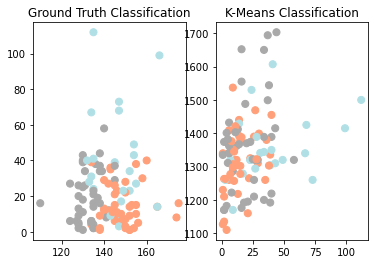

In [206]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=df['weight'],y=df['rank'],c=color_theme[clustering.labels_],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')
